In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
"""
線形な関数を活性化関数に使うと多層の行列式が１つの計算式で表現される
そしたら多層にしている意味がなくなる
"""
###ネットワークの定義###
x=tf.placeholder(tf.float32,[None,10])  #入力の定義　ニューロン数が１０のデータが１つ
W=tf.Variable(tf.random.uniform([10,1],minval=0,maxval=1,dtype=tf.float32)) #重みの定義　ネットワークを学習する際はここを更新する
b=tf.Variable(tf.zeros([1])) #バイアス，ネットワークを学習する際はここを更新する
a=tf.matmul(x,W)+b #行列計算  1*10の入力　10*1列の重みの計算　
y=tf.nn.softmax(a) #活性化関数 sigmoid softmaxは出力をニューロンの値を0~1,全ニューロンの合計値が１になるようにする
sess=tf.Session() #数値データが必ず１になる aが何かの数字だと出力が決まる　上の動作
sess.run(tf.global_variables_initializer()) #初期化

#run
in_x=np.array([[1,2,3,4,5,6,7,8,9,10]]) #配列作成
y_,x_,W_,b_,a_=sess.run([y,x,W,b,a],feed_dict={x:in_x}) #in_xをxに入れてy,x,W~の値をとる
print(x_)
print(W_)
print(b_)
print(a_)
print(y_)
sess.close()

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]
[[0.95494807]
 [0.38232338]
 [0.05041301]
 [0.69106305]
 [0.149773  ]
 [0.42946517]
 [0.62865734]
 [0.72696865]
 [0.7648815 ]
 [0.48829806]]
[0.]
[[29.944008]]
[[1.]]


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


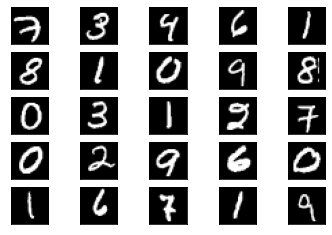

0.1001


In [ ]:
"""
mnistデータセットの画像は全て28*28のグレースケール画像だから１次元ベクトルに変換し，１*７８４とする
入力された値から1*10のベクトルを出力する．これは分類が0~9の10種類であるため．
中間層なしのネットワークだから直接softmaxを使用
mnistデータセットから100枚取り出したミニバッチに対する分類を行っている
"""

from tensorflow.examples. tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#ネットワークの定義
x=tf.placeholder(tf.float32,[None,784]) #縦横 １列に並べ直す　DNNは１次元で計算させる
y=tf.placeholder(tf.float32,[None,10]) #どの数字かを表現させる箱

#変数定義 784の10次元
W=tf.Variable(tf.random.uniform([784,10],minval=0,maxval=1,dtype=tf.float32))
b=tf.Variable(tf.zeros([10]))

#ネットワークの定義
y_=tf.nn.softmax(tf.matmul(x,W)+b)

#誤差関数定義(交差エントロピー)
cross_entropy=-tf.reduce_sum(y*tf.log(y_))

#訓練方法の定義 0.01の係数で解をupdate
train_step=tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

#精度計算の定義
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))

#セッションの開始
sess=tf.Session()

#定義した変数の初期化
sess.run(tf.global_variables_initializer())

#データ読み込み
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True) #データ読み込み
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.reshape(mnist.train.images[i, :].astype(np.float32),[28,28]),cmap=plt.get_cmap("gray"))
plt.show()
  
  #精度の表示
test_acc=sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
print(test_acc)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


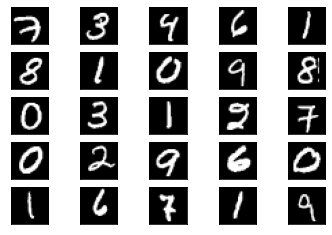

0.9141


In [ ]:
"""
重みの値をうまく分類できるように学習する．ネットワークの出力と答えの差の平均が小さくなるように重みの
パラメータを変更することができれば分類できると考える．ネットワークの出力は答えの部分は100%
それ以外の部分は0%に近いて欲しいためこの二つのベクトルの誤差を小さくするようにパラメータを更新する
最大値0.65とする．この値を持っている数字は９だから分類結果は９のように考える
"""
from tensorflow.examples. tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#ネットワークの定義
x=tf.placeholder(tf.float32,[None,784]) #縦横 １列に並べ直す　DNNは１次元で計算させる
y=tf.placeholder(tf.float32,[None,10]) #どの数字かを表現させる箱

#変数定義 784の10次元
W=tf.Variable(tf.random.uniform([784,10],minval=0,maxval=1,dtype=tf.float32))
b=tf.Variable(tf.zeros([10]))

#ネットワークの定義
y_=tf.nn.softmax(tf.matmul(x,W)+b)

#誤差関数定義(交差エントロピー) 分類を行うときによく使う関数
cross_entropy=-tf.reduce_sum(y*tf.log(y_))

#訓練方法の定義 0.01の係数で解をupdate
train_step=tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

#精度計算の定義
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))

#セッションの開始
sess=tf.Session()

#定義した変数の初期化
sess.run(tf.global_variables_initializer())

#データ読み込み
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True) #データ読み込み
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.reshape(mnist.train.images[i, :].astype(np.float32),[28,28]),cmap=plt.get_cmap("gray"))
plt.show()

#トレーニングデータセットから100枚取り出して学習を1000回行う
#トレーニング部分 学習データを使って誤差を低くする．そのため一部を選んで更新 データだけ書けば良い
for i in range(1000): 
  batch_xs,batch_ys=mnist.train.next_batch(100)
  sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})

#精度の表示 誤差を小さくするようにパラメータを更新することで未知のデータの分類の精度も向上する
test_acc=sess.run(accuracy,feed_dict={x:mnist.test.images, y: mnist.test.labels})
print(test_acc)